In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs_rel_suboptim

In [25]:
fontsize = 14
entity_name = "sketchy-opts"
project_name1 = "linear_convergence_inducing_krr_v2"

In [26]:
x_axes = ["time", "datapasses", "iters"]
save_dir = "./plots/synthetic"
ylim = [1e-14, 1e1]

In [27]:
runs_inducing_krr = get_project_runs(entity_name, project_name1)

In [28]:
set_fontsize(fontsize)

# Render plots in LaTeX
render_in_latex()

In [29]:
hparams_to_label = {
    "sketchysaga": ["r"],
    "pcg": ["precond"],
}
color_param = "r"

In [30]:
falkon_criteria = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precond": lambda run: run.config["precond_params"]["type"] == "falkon",
}
sketchy_criteria = {
    "optimizer": lambda run: run.config["opt"] == "sketchysaga",
}

In [31]:
falkon_run = filter_runs(runs_inducing_krr, falkon_criteria)
sketchy_runs = filter_runs(runs_inducing_krr, sketchy_criteria)

all_runs = falkon_run + sketchy_runs

In [32]:
# Get final training loss from Falkon
falkon_train_loss = falkon_run[0].summary["train_loss"]

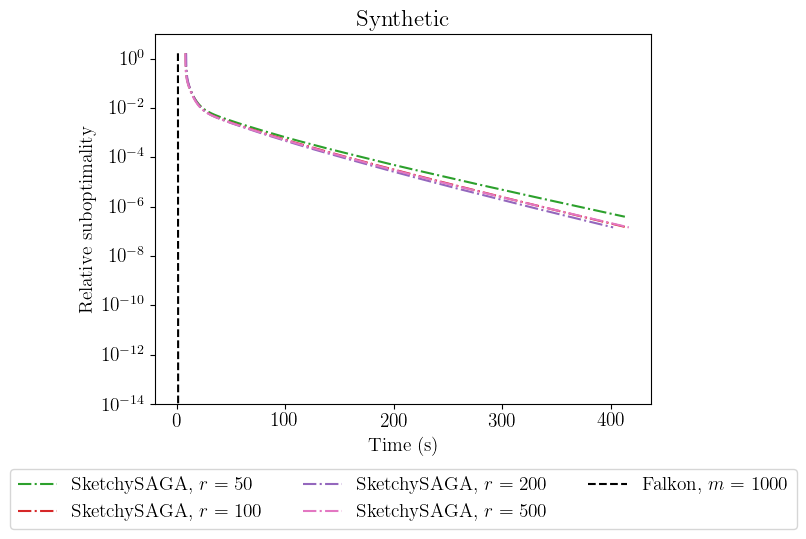

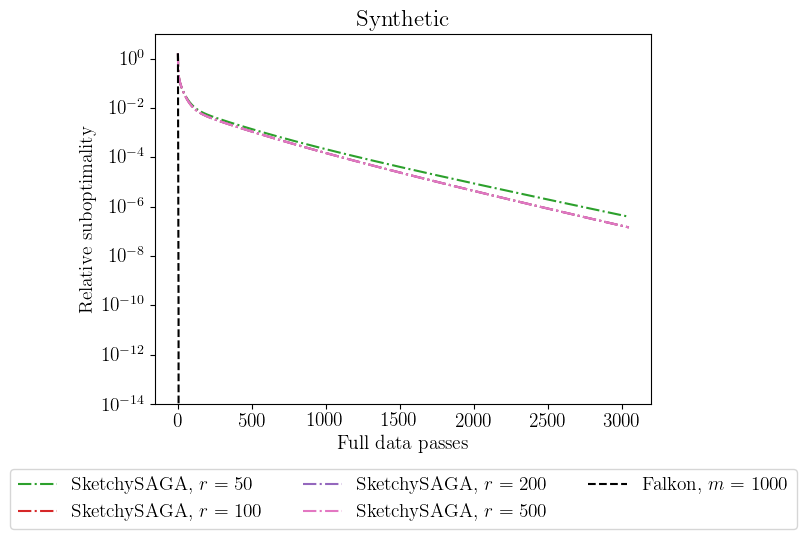

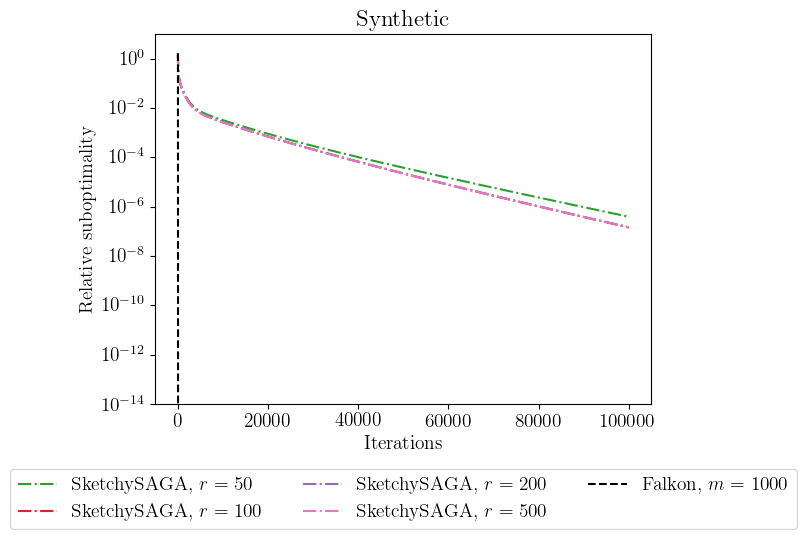

In [33]:
for x_axis in x_axes:
    plot_runs_rel_suboptim(all_runs, hparams_to_label, color_param, falkon_train_loss, 
                        x_axis, ylim, "Synthetic", save_dir, save_name=f"inducing_rel_subopt_vs_{x_axis}.pdf")